### importing necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#  Step 1: Data Exploration and Cleaning

In [4]:
# loading the dataset
data = pd.read_csv('Titanic-Dataset.csv')

# inspecting the first few rows of the dataset
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# checking the dimensions and shape of the dataset
data.shape

(891, 12)

In [7]:
# checking for missing values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### handling missing values

In [8]:
# filling missing Age values with the median age
data['Age'].fillna(data['Age'].median(), inplace=True)

# dropping 'Cabin' due to high number of missing values
data.drop(columns=['Cabin'], inplace=True)

# dropping rows where 'Embarked' is missing
data.dropna(subset=['Embarked'], inplace=True)

In [9]:
# checking for missing values
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

# Step 2: Feature Engineering

In [10]:
# converting categorical variables into numerical ones
data = pd.get_dummies(data, columns=['Sex', 'Embarked'], drop_first=True)

In [11]:
# creating new feature: FamilySize
data['FamilySize'] = data['SibSp'] + data['Parch'] + 1

In [12]:
# dropping irrelevant features
data.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)

In [13]:
# inspect first few columns of the cleaned dataset
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male,Embarked_Q,Embarked_S,FamilySize
0,0,3,22.0,1,0,7.2500,1,0,1,2
1,1,1,38.0,1,0,71.2833,0,0,0,2
2,1,3,26.0,0,0,7.9250,0,0,1,1
3,1,1,35.0,1,0,53.1000,0,0,1,2
4,0,3,35.0,0,0,8.0500,1,0,1,1


# Step 3: Model Selection and Training

In [14]:
# defining features and target variable
X = data.drop(columns=['Survived'])
y = data['Survived']

In [15]:
# splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
# importing Decision Tree model
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [19]:
# training Decision Tree model
dec_tree = DecisionTreeClassifier()
dec_tree.fit(X_train, y_train)

DecisionTreeClassifier()

In [22]:
# evaluating the model
y_pred = dec_tree.predict(X_test)
print(f'Model - Accuracy: {accuracy_score(y_test, y_pred):.2f}, Precision: {precision_score(y_test, y_pred):.2f}, Recall: {recall_score(y_test, y_pred):.2f}, F1 Score: {f1_score(y_test, y_pred):.2f}')


Model - Accuracy: 0.77, Precision: 0.68, Recall: 0.77, F1 Score: 0.72


#  Step 4: Prediction and Conclusion

In [23]:
# using the model to make predictions on the test set
predictions = dec_tree.predict(X_test)

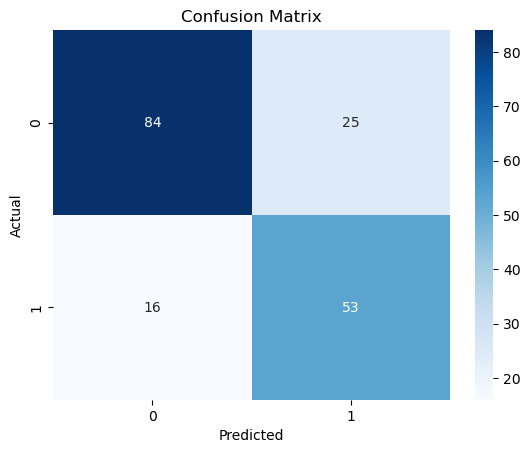

In [24]:
# summarizing findings and conclusions
conf_matrix = confusion_matrix(y_test, predictions)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()